# Gezinomi Kural Tabanlı Sınıflandırma ile Potansiyel Müşteri Getirisi Hesaplama 
Gezinomi yaptığı satışların bazı özelliklerini kullanarak seviye tabanlı
 (level based) yeni satış tanımları oluşturmak ve bu yeni satış
 tanımlarına göre segmentler oluşturup bu segmentlere göre yeni 
gelebilecek müşterilerin şirkete ortalama ne kadar kazandırabileceğini
 tahminetmekistemektedir.

In [1]:
#Kütüphaneler
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_excel("miuul_gezinomi.xlsx")
df.head()

,SaleId,SaleDate,CheckInDate,Price,ConceptName,SaleCityName,CInDay,SaleCheckInDayDiff,Seasons
0,415122,2022-12-03,2022-12-03,79.304029,Herşey Dahil,Antalya,Saturday,0,Low
1,415103,2022-12-03,2022-12-03,45.970696,Yarım Pansiyon,Antalya,Saturday,0,Low
2,404034,2022-09-12,2022-09-13,77.838828,Herşey Dahil,Antalya,Tuesday,1,High
3,415094,2022-12-03,2022-12-10,222.710623,Yarım Pansiyon,İzmir,Saturday,7,Low
4,414951,2022-12-01,2022-12-03,140.476190,Yarım Pansiyon,İzmir,Saturday,2,Low


### EDA (exploratory data analysis )


In [16]:
def check_df(df):
    print("########## SHAPE ##########")
    print(df.shape)
    print("########## INDEX ##########")
    print(df.index)
    print("########## IS NULL ##########")
    isnull=df.isnull().values.any()
    print(isnull)
    if isnull:
        print("########## NUMBER OF NULLS ##########")
        print(df.isnull().sum())
    
    print("########## GENERAL INFO ##########")
    print(df.info())
    print("########## DESCRIBE NUMERICAL FEATURES ##########")
    print(df.describe(percentiles=[0,0.05,0.50,0.95,0.99,1]).T)

In [17]:
check_df(df)

########## SHAPE ##########
(59164, 9)
########## INDEX ##########
RangeIndex(start=0, stop=59164, step=1)
########## IS NULL ##########
True
########## NUMBER OF NULLS ##########
SaleId                 0
SaleDate               0
CheckInDate            0
Price                 13
ConceptName            0
SaleCityName           0
CInDay                 0
SaleCheckInDayDiff     0
Seasons                0
dtype: int64
########## GENERAL INFO ##########
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59164 entries, 0 to 59163
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   SaleId              59164 non-null  int64         
 1   SaleDate            59164 non-null  datetime64[ns]
 2   CheckInDate         59164 non-null  datetime64[ns]
 3   Price               59151 non-null  float64       
 4   ConceptName         59164 non-null  object        
 5   SaleCityName        59164 non-null  object

In [21]:
df.nunique()

SaleId                51861
SaleDate               2314
CheckInDate            2173
Price                 19642
ConceptName               3
SaleCityName              6
CInDay                    7
SaleCheckInDayDiff      309
Seasons                   2
dtype: int64

In [24]:
# unique şehir isimleri
print(df["SaleCityName"].unique())
print(df["SaleCityName"].value_counts())

['Antalya' 'İzmir' 'Diğer' 'Aydın' 'Muğla' 'Girne']
Antalya    31649
Muğla      10662
Aydın      10646
Diğer       3245
İzmir       2507
Girne        455
Name: SaleCityName, dtype: int64


In [25]:
#unique concept'ler
print(df["ConceptName"].unique())
print(df["ConceptName"].value_counts())

['Herşey Dahil' 'Yarım Pansiyon' 'Oda + Kahvaltı']
Herşey Dahil      53186
Yarım Pansiyon     3559
Oda + Kahvaltı     2419
Name: ConceptName, dtype: int64


In [38]:
# şehre göre satışlardan kazanılan 
df2=df.groupby("SaleCityName").agg({"Price":"sum"})
df2["Formated Price"]=df2["Price"].apply(lambda x: "{:f}".format(x))
df2

,Price,Formated Price
SaleCityName,,
Antalya,2.041911e+06,2041911.096192
Aydın,5.732960e+05,573296.009115
Diğer,1.545723e+05,154572.290394
Girne,2.706503e+04,27065.028288
Muğla,6.658422e+05,665842.212637
İzmir,1.659348e+05,165934.834002


In [39]:
# Konsepte göre satışlardan kazanılan 
df2=df.groupby("ConceptName").agg({"Price":"sum"})
df2["Formated Price"]=df2["Price"].apply(lambda x: "{:f}".format(x))
df2

,Price,Formated Price
ConceptName,,
Herşey Dahil,3.332911e+06,3332910.767784
Oda + Kahvaltı,1.213084e+05,121308.352681
Yarım Pansiyon,1.744024e+05,174402.350163


In [44]:
# Şehre göre Price ortalamaları
df.groupby("SaleCityName").agg({"Price": "mean"})

,Price
SaleCityName,
Antalya,64.521474
Aydın,53.855896
Diğer,47.707497
Girne,59.483579
Muğla,62.461746
İzmir,66.267905


In [42]:
# Konsepte göre göre Price ortalamaları
df.groupby("ConceptName").agg({"Price": "mean"})

,Price
ConceptName,
Herşey Dahil,62.672260
Oda + Kahvaltı,50.252010
Yarım Pansiyon,49.030742


In [46]:
# Şehir - konsept kırılımnda Price
df.groupby(["SaleCityName","ConceptName"]).agg({"Price":"mean"})

Price
SaleCityName ConceptName              
Antalya      Herşey Dahil    64.519028
             Oda + Kahvaltı  63.504816
             Yarım Pansiyon  67.190613
Aydın        Herşey Dahil    53.995467
             Oda + Kahvaltı  34.458787
             Yarım Pansiyon  30.016543
Diğer        Herşey Dahil    84.771093
             Oda + Kahvaltı  37.599082
             Yarım Pansiyon  42.113440
Girne        Herşey Dahil    97.680970
             Oda + Kahvaltı  39.775536
             Yarım Pansiyon  53.247838
Muğla        Herşey Dahil    63.020053
             Oda + Kahvaltı  59.037763
             Yarım Pansiyon  45.120924
İzmir        Herşey Dahil    74.701519
             Oda + Kahvaltı  41.320342
             Yarım Pansiyon  59.610053

In [11]:
#FEATURE'LARIN KATEGORİK VE SAYISAL OLARAK AYRILMASI
def grab_col_names(dataframe, cat_th=10, car_th=20):
  
  cat_cols=[col for col in dataframe.columns if str(df[col].dtype) in ["object","category","bool"]]
  num_but_cat=[col for col in df.columns if (str(df[col].dtype) in ["float4", "int64"]) & (df[col].nunique()<cat_th)]
  cat_but_car=[col for col in df.columns if (str(df[col].dtype) in ["object", "category"]) & (df[col].nunique()>car_th)]
  cat_cols = cat_cols + num_but_cat
  cat_cols = [col for col in cat_cols if col not in cat_but_car]

  num_cols=[col for col in df.columns if (str(df[col].dtype) in ["float64", "int64"]) & (col not in cat_cols)]
  num_cols=[col for col in num_cols if col not in cat_cols]

  print(f"Observations: {dataframe.shape[0]}")
  print(f"Variables: {dataframe.shape[1]}")
  print(f"cat_cols: {len(cat_cols)}")
  print(f"num_cols: {len(num_cols)}")
  print(f"cat_but_car: {len(cat_but_car)}")

  return cat_cols, num_cols, cat_but_car

In [12]:
cat_cols, num_cols, cat_but_car = grab_col_names(df)
print("\n")
print("cat_cols: ",cat_cols)
print("num_cols: ",num_cols)
print("cat_but_car: ",cat_but_car)


Observations: 59164
Variables: 9
cat_cols: 4
num_cols: 3
cat_but_car: 0


cat_cols:  ['ConceptName', 'SaleCityName', 'CInDay', 'Seasons']
num_cols:  ['SaleId', 'Price', 'SaleCheckInDayDiff']
cat_but_car:  []


<AxesSubplot:ylabel='Frequency'>

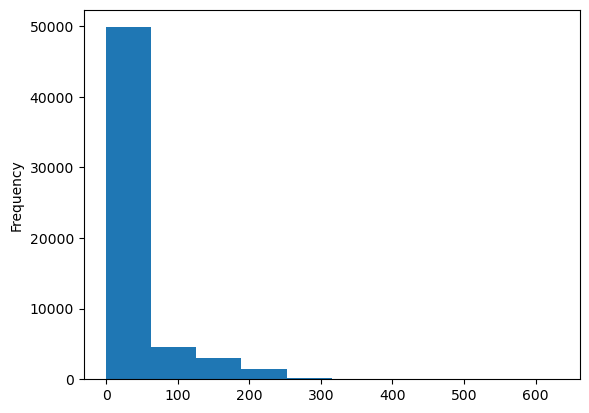

In [26]:
df["SaleCheckInDayDiff"].plot(kind="hist")

<AxesSubplot:>

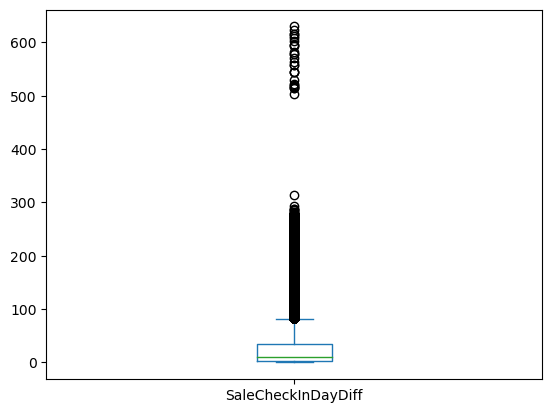

In [24]:
df["SaleCheckInDayDiff"].plot(kind="box")

In [33]:
#SaleCheckInDayDiff değişkenini kategorik değişkene dönüştürme
# 0_7’, ‘7_30', ‘30_90', ‘90_max => "Last Minuters", "Potential Planners", "Planners", "Early Bookers"
df["SaleCheckInDayDiff_Cat"] = pd.cut(df["SaleCheckInDayDiff"],
                                      bins=[-1,7,30,90,df["SaleCheckInDayDiff"].max()],
                                      labels=["Last Minuters", "Potential Planners", "Planners", "Early Bookers"])
df[["SaleCheckInDayDiff","SaleCheckInDayDiff_Cat"]].head(20)

,SaleCheckInDayDiff,SaleCheckInDayDiff_Cat
0,0,Last Minuters
1,0,Last Minuters
2,1,Last Minuters
3,7,Last Minuters
4,2,Last Minuters
5,0,Last Minuters
6,6,Last Minuters
7,0,Last Minuters
8,1,Last Minuters
9,0,Last Minuters


In [37]:
# rename "SaleCheckInDayDiff_Cat" as "EB_Score"
df.rename(columns={"SaleCheckInDayDiff_Cat":"EB_Score"},inplace=True)
df.head(2)

,SaleId,SaleDate,CheckInDate,Price,ConceptName,SaleCityName,CInDay,SaleCheckInDayDiff,Seasons,EB_Score
0,415122,2022-12-03,2022-12-03,79.304029,Herşey Dahil,Antalya,Saturday,0,Low,Last Minuters
1,415103,2022-12-03,2022-12-03,45.970696,Yarım Pansiyon,Antalya,Saturday,0,Low,Last Minuters


In [38]:
# Şehir-Concept-EB Score

df.groupby(["SaleCityName", "ConceptName", "EB_Score"]).agg({"Price": ["mean","count"]})

Price       
                                                     mean  count
SaleCityName ConceptName    EB_Score                            
Antalya      Herşey Dahil   Last Minuters       62.752916  14148
                            Potential Planners  64.903700   8874
                            Planners            67.879960   4490
                            Early Bookers       66.494885   3281
             Oda + Kahvaltı Last Minuters       65.353740    503
...                                                   ...    ...
İzmir        Oda + Kahvaltı Early Bookers       66.928111      3
             Yarım Pansiyon Last Minuters       57.788126    636
                            Potential Planners  64.804043    198
                            Planners            60.507887     47
                            Early Bookers       65.905583     14

[72 rows x 2 columns]

In [39]:
#Şehir-Concept-Sezon
df.groupby(["SaleCityName", "ConceptName", "Seasons"]).agg({"Price": ["mean","count"]})

Price       
                                           mean  count
SaleCityName ConceptName    Seasons                   
Antalya      Herşey Dahil   High      64.920065  27126
                            Low       61.552427   3667
             Oda + Kahvaltı High      66.267969    303
                            Low       60.666730    295
             Yarım Pansiyon High      73.259029    118
                            Low       62.001678    138
Aydın        Herşey Dahil   High      54.946560  10103
                            Low       33.680699    473
             Oda + Kahvaltı High      30.387530     27
                            Low       44.451874     11
             Yarım Pansiyon High      32.626152     20
                            Low       25.271799     11
Diğer        Herşey Dahil   High      83.787273    364
                            Low       87.310882    141
             Oda + Kahvaltı High      34.839543    349
                            Low       39.959569    408
             Yarım Pansiyon High      39.731916    516
                            Low       42.953978   1462
Girne        Herşey Dahil   High     103.935448     55
                            Low       90.935944     51
             Oda + Kahvaltı High      39.479630     66
                            Low       40.043067     73
             Yarım Pansiyon High      58.383668    100
                            Low       48.578903    110
Muğla        Herşey Dahil   High      63.384036   9582
                            Low       48.304086    237
             Oda + Kahvaltı High      61.264691    592
                            Low       37.774192     62
             Yarım Pansiyon High      45.823698    177
                            Low       32.681812     10
İzmir        Herşey Dahil   High      74.748363   1234
                            Low       74.308287    147
             Oda + Kahvaltı High      54.141797     86
                            Low       33.555235    142
             Yarım Pansiyon High      87.657303    118
                            Low       55.350626    777

In [46]:
#Şehir-Concept-Sezon Price'a göre sıralanmış
#Şehir-Concept-Sezon'a göre gruplandırlan tablo da price'ın ortalamsı alındı. Bu ortalamlar daha sonra SEGMENT olarak A,B,C,D kategorilerine ayrılacak.
#Böylece her Şehir-Concept-Sezon grubuna bir price ve segment atamış olunacak
agg_df = df.groupby(["SaleCityName", "ConceptName", "Seasons"]).agg({"Price": "mean"}).sort_values("Price",ascending=False)
agg_df

Price
SaleCityName ConceptName    Seasons            
Girne        Herşey Dahil   High     103.935448
                            Low       90.935944
İzmir        Yarım Pansiyon High      87.657303
Diğer        Herşey Dahil   Low       87.310882
                            High      83.787273
İzmir        Herşey Dahil   High      74.748363
                            Low       74.308287
Antalya      Yarım Pansiyon High      73.259029
             Oda + Kahvaltı High      66.267969
             Herşey Dahil   High      64.920065
Muğla        Herşey Dahil   High      63.384036
Antalya      Yarım Pansiyon Low       62.001678
             Herşey Dahil   Low       61.552427
Muğla        Oda + Kahvaltı High      61.264691
Antalya      Oda + Kahvaltı Low       60.666730
Girne        Yarım Pansiyon High      58.383668
İzmir        Yarım Pansiyon Low       55.350626
Aydın        Herşey Dahil   High      54.946560
İzmir        Oda + Kahvaltı High      54.141797
Girne        Yarım Pansiyon Low       48.578903
Muğla        Herşey Dahil   Low       48.304086
             Yarım Pansiyon High      45.823698
Aydın        Oda + Kahvaltı Low       44.451874
Diğer        Yarım Pansiyon Low       42.953978
Girne        Oda + Kahvaltı Low       40.043067
Diğer        Oda + Kahvaltı Low       39.959569
             Yarım Pansiyon High      39.731916
Girne        Oda + Kahvaltı High      39.479630
Muğla        Oda + Kahvaltı Low       37.774192
Diğer        Oda + Kahvaltı High      34.839543
Aydın        Herşey Dahil   Low       33.680699
İzmir        Oda + Kahvaltı Low       33.555235
Muğla        Yarım Pansiyon Low       32.681812
Aydın        Yarım Pansiyon High      32.626152
             Oda + Kahvaltı High      30.387530
             Yarım Pansiyon Low       25.271799

In [40]:
#Şehir-Concept-CInDay
df.groupby(["SaleCityName", "ConceptName", "CInDay"]).agg({"Price": ["mean","count"]})

Price      
                                            mean count
SaleCityName ConceptName    CInDay                    
Antalya      Herşey Dahil   Friday     62.658940  4136
                            Monday     63.259143  6831
                            Saturday   64.415526  4741
                            Sunday     65.849177  3818
                            Thursday   62.892734  3898
...                                          ...   ...
İzmir        Yarım Pansiyon Saturday   52.504725   315
                            Sunday     98.934697    68
                            Thursday   52.484894    91
                            Tuesday    56.141381    73
                            Wednesday  54.064392    86

[126 rows x 2 columns]

In [63]:
# Rename indexes
agg_df.reset_index(inplace=True)
agg_df.head(3)

,SaleCityName,ConceptName,Seasons,Price
0,Girne,Herşey Dahil,High,103.935448
1,Girne,Herşey Dahil,Low,90.935944
2,İzmir,Yarım Pansiyon,High,87.657303


In [83]:
agg_df.iloc[:,:-1].shape

(36, 3)

In [85]:
# Yeni seviye tabanlı müşterileri (persona) tanımlana
agg_df["sales_level_based"]=agg_df.iloc[:,:-1].agg(lambda x: "_".join(x).upper(), axis=1)
agg_df["sales_level_based"]

0         GIRNE_HERŞEY DAHIL_HIGH
1          GIRNE_HERŞEY DAHIL_LOW
2       İZMIR_YARIM PANSIYON_HIGH
3          DIĞER_HERŞEY DAHIL_LOW
4         DIĞER_HERŞEY DAHIL_HIGH
5         İZMIR_HERŞEY DAHIL_HIGH
6          İZMIR_HERŞEY DAHIL_LOW
7     ANTALYA_YARIM PANSIYON_HIGH
8     ANTALYA_ODA + KAHVALTI_HIGH
9       ANTALYA_HERŞEY DAHIL_HIGH
10        MUĞLA_HERŞEY DAHIL_HIGH
11     ANTALYA_YARIM PANSIYON_LOW
12       ANTALYA_HERŞEY DAHIL_LOW
13      MUĞLA_ODA + KAHVALTI_HIGH
14     ANTALYA_ODA + KAHVALTI_LOW
15      GIRNE_YARIM PANSIYON_HIGH
16       İZMIR_YARIM PANSIYON_LOW
17        AYDIN_HERŞEY DAHIL_HIGH
18      İZMIR_ODA + KAHVALTI_HIGH
19       GIRNE_YARIM PANSIYON_LOW
20         MUĞLA_HERŞEY DAHIL_LOW
21      MUĞLA_YARIM PANSIYON_HIGH
22       AYDIN_ODA + KAHVALTI_LOW
23       DIĞER_YARIM PANSIYON_LOW
24       GIRNE_ODA + KAHVALTI_LOW
25       DIĞER_ODA + KAHVALTI_LOW
26      DIĞER_YARIM PANSIYON_HIGH
27      GIRNE_ODA + KAHVALTI_HIGH
28       MUĞLA_ODA + KAHVALTI_LOW
29      DIĞER_

In [90]:
agg_df["SEGMENTS"] = pd.qcut(agg_df["Price"],4,["D","C","B","A"])

In [91]:
agg_df.head(2)

,SaleCityName,ConceptName,Seasons,Price,sales_level_based,SEGMENTS
0,Girne,Herşey Dahil,High,103.935448,GIRNE_HERŞEY DAHIL_HIGH,A
1,Girne,Herşey Dahil,Low,90.935944,GIRNE_HERŞEY DAHIL_LOW,A


In [93]:
agg_df.groupby("SEGMENTS").agg({"Price":["mean","sum","max"]})

Price                        
               mean         sum         max
SEGMENTS                                   
D         33.366288  300.296592   39.479630
C         44.887654  403.988887   54.141797
B         60.274498  542.470478   64.920065
A         82.467833  742.210498  103.935448

In [98]:
agg_df.drop(["SaleCityName","ConceptName","Seasons"],axis=1,inplace=True)

In [99]:
agg_df.head(2)

,Price,sales_level_based,SEGMENTS
0,103.935448,GIRNE_HERŞEY DAHIL_HIGH,A
1,90.935944,GIRNE_HERŞEY DAHIL_LOW,A


In [100]:
agg_df.shape

(36, 3)

In [101]:
new_user="ANTALYA_HERŞEY DAHIL_HIGH"
agg_df[agg_df["sales_level_based"]==new_user]

,Price,sales_level_based,SEGMENTS
9,64.920065,ANTALYA_HERŞEY DAHIL_HIGH,B
